In [2]:
import timeit
import numpy as np
import random

###***1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.***

* Matrix multiplication involves multiplying each element of a row in the first matrix by the corresponding element in a column of the second matrix and summing up these products. The result is a new matrix.

* Let's consider the dimensions of the matrices:

  - Matrix $A: (n, k)$
  - Matrix $B: (k, m)$

* To calculate the elements of the resulting matrix $C$ result of $( A \times B)$, each element $C_{ij}$ is obtained by multiplying the elements of the $i$-th row of $A$ by the corresponding elements of the $j$-th column of $B$ and summing up these products.

* For each element $C_{ij}$, you perform $k$  multiplications (for the $k$ corresponding elements) and $k-1$ additions (to sum up these products).

* Since there are $n$ rows and $m$ columns in the resulting matrix $C$, the total number of multiplications:

$$\text{Total multiplications} = n \times m \times k$$

###***2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?***

In [94]:
# Matrix multiplication using lists of lists

def matrix_multiply_lists(mat_1, mat_2):
    N = len(mat_1)
    K = len(mat_1[0])
    M = len(mat_2[0])
    mat_3_py = [[0 for i in range(M)] for j in range(N)]

    for i in range(N):
        for k in range(M):
            val = 0
            for j in range(K):
                val += mat_1[i][j] * mat_2[j][k]
            mat_3_py[i][k] = val

    return mat_3_py

# Matrix multiplication using NumPy

def matrix_multiply_numpy(mat_1, mat_2):
    mat_1_np = np.array(mat_1)
    mat_2_np = np.array(mat_2)
    mat_3_np = np.dot(mat_1_np, mat_2_np)

    return mat_3_np

mat_1 = [[2, 5, 7], [9, 3, 1], [2, 1, 5], [3, 6, 4]]
mat_2 = [[0, 3, 2, 1, 0], [5, 7, 3, 6, 0], [9, 6, 8, 0, 7]]


start_time_lists = timeit.default_timer()
result_lists = matrix_multiply_lists(mat_1, mat_2)
end_time_lists = timeit.default_timer()

print("Matrix multiplication using lists of lists:\n")
print(f"{np.array(result_lists)}\n")
print(f"Time taken using list of list: {end_time_lists - start_time_lists}")


start_time_numpy = timeit.default_timer()
result_numpy = matrix_multiply_numpy(mat_1, mat_2)
end_time_numpy = timeit.default_timer()

print(f"\nMatrix multiplication using NumPy:\n")
print(f"{result_numpy}\n")
print(f"Time taken using Numpy: {end_time_numpy - start_time_numpy}")

Matrix multiplication using lists of lists:

[[88 83 75 32 49]
 [24 54 35 27  7]
 [50 43 47  8 35]
 [66 75 56 39 28]]

Time taken using list of list: 0.010425442000268959

Matrix multiplication using NumPy:

[[88 83 75 32 49]
 [24 54 35 27  7]
 [50 43 47  8 35]
 [66 75 56 39 28]]

Time taken using Numpy: 0.00020643899915739894


**Answer:-** List of list takes less time than Numpy's `dot` operator.

### ***3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against `numpy.median` routine in terms of time?***

In [12]:
def array_pass(arr,k):
  if len(arr)==1:
    return arr[0]
  pivot = random.choice(arr)
  low = [ele for ele in arr if ele < pivot]
  pivots = [ele for ele in arr if ele == pivot]
  high = [ele for ele in arr if ele > pivot]

  if k < len(low):
    return array_pass(low,k)
  if k < len(low) + len(pivots):
    return pivots[0]
  else:
    return array_pass(high,k-len(low) - len(pivots))

def find_median(arr):
  n = len(arr)
  if n%2 == 1:
    return array_pass(arr,n//2)
  else:
    mid1 = array_pass(arr, n//2-1)
    mid2 = array_pass(arr,n//2)
    return (mid1 + mid2)/2


# Using sort function

def using_sort_function(arr):
  sorted_arr = arr.sort()
  if len(arr)%2 == 0:
    return (arr[len(arr)//2]+arr[len(arr)//2 - 1])/2
  else:
    return (arr[len(arr)//2])/2

arr = [3,2,1,4,5,6]

start_time = timeit.default_timer()
median_arr_pass = find_median(arr)
end_time = timeit.default_timer()

print(f"Using own function median is: {median_arr_pass}")
print(f"Time taken by it:- {end_time - start_time}")
print("*"*50)

start_time = timeit.default_timer()
median_arr_sort = using_sort_function(arr)
end_time = timeit.default_timer()

print(f"Using sorted function median is: {median_arr_sort}")
print(f"Time taken by it:- {end_time - start_time}")
print("*"*50)

start_time = timeit.default_timer()
median_np = np.median(arr)
end_time = timeit.default_timer()

print(f"Using own function median is: {median_np}")
print(f"Time taken by the function:- {end_time - start_time}")


Using own function median is: 3.5
Time taken by it:- 5.911999960517278e-05
**************************************************
Using sorted function median is: 3.5
Time taken by it:- 4.982999962521717e-05
**************************************************
Using own function median is: 3.5
Time taken by the function:- 0.00028608999946300173


### ***4. What is the gradient of the following function with respect to x and y?***

$$
x^2y + y^3\sin(x)
$$



$$
\text{The partial derivatives of the function } f(x, y) = x^2y + y^3\sin(x) \text{ are given by:}
$$

$$
\frac{\partial f}{\partial x} = 2xy + y^3\cos(x)
$$

$$
\frac{\partial f}{\partial y} = x^2 + 3y^2\sin(x)
$$

$$
\text{The gradient vector is:}
$$

$$
\vec{\nabla}f = \left(2xy + y^3\cos(x), x^2 + 3y^2\sin(x)\right)
$$


### ***5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y***

In [6]:
import jax
import jax.numpy as jnp

def f(x, y):
    return (x**2) * y + (y**3) * jnp.sin(x)

def f_x(x, y):
    return 2 * x * y + (y**3) * jnp.cos(x)

def f_y(x, y):
    return (x**2) + 3 * (y**2) * jnp.sin(x)

# Analytical solution
x_val = 2
y_val = 3
f_val = f(x_val, y_val)
f_x_val = f_x(x_val, y_val)
f_y_val = f_y(x_val, y_val)

print('Analytical Solution:')
print(f'Function value at X = {x_val} and Y = {y_val}:- {f_val:.4f}')
print(f'Derivative w.r.t X at X = {x_val} and Y = {y_val}:- {f_x_val:.4f}')
print(f'Derivative w.r.t Y at X = {x_val} and Y = {y_val}:- {f_y_val:.4f}\n')

# JAX solution
x_jax = jnp.float32(x_val)
y_jax = jnp.float32(y_val)
grad_x_fun = jax.grad(f, argnums=0)
grad_y_fun = jax.grad(f, argnums=1)
f_x_jax = grad_x_fun(x_jax, y_jax)
f_y_jax = grad_y_fun(x_jax, y_jax)

print('Using JAX:')
print(f'Function value at X = {x_val} and Y = {y_val}:- {f(x_val, y_val):.4f}')
print(f'Derivative w.r.t X at X = {x_val} and Y = {y_val}:- {f_x_jax:.4f}')
print(f'Derivative w.r.t Y at X = {x_val} and Y = {y_val}:- {f_y_jax:.4f}\n')

print('JAX solution matches with the Analytical Solution')

Analytical Solution:
Function value at X = 2 and Y = 3:- 36.5510
Derivative w.r.t X at X = 2 and Y = 3:- 0.7640
Derivative w.r.t Y at X = 2 and Y = 3:- 28.5510

Using JAX:
Function value at X = 2 and Y = 3:- 36.5510
Derivative w.r.t X at X = 2 and Y = 3:- 0.7640
Derivative w.r.t Y at X = 2 and Y = 3:- 28.5510

JAX solution matches with the Analytical Solution


### ***6. Use `sympy` to confirm that you obtain the same gradient analytically.***

In [7]:
from sympy import symbols, diff, sin

# Define symbols
x, y = symbols('x y')

f = (x**2) * y + (y**3) * sin(x)

# Calculate partial derivatives
df_dx = diff(f, x)
df_dy = diff(f, y)

print("Expression for df/dx:-")
df_dx


Expression for df/dx:-


2*x*y + y**3*cos(x)

In [8]:
print("Expression for df/dy:-")
df_dy

Expression for df/dy:-


x**2 + 3*y**2*sin(x)

In [9]:
# Specify values for x and y
x_value = 2.0
y_value = 3.0

# Evaluate derivatives at specified values
derivative_wrt_x_value = df_dx.subs({x: x_value, y: y_value})
derivative_wrt_y_value = df_dy.subs({x: x_value, y: y_value})

# Print the results
print(f"The derivative with respect to x at x = {x_value} and y = {y_value} is: {derivative_wrt_x_value.evalf():.4f}")
print(f"The derivative with respect to y at x = {x_value} and y = {y_value} is: {derivative_wrt_y_value.evalf():.4f}")


The derivative with respect to x at x = 2.0 and y = 3.0 is: 0.7640
The derivative with respect to y at x = 2.0 and y = 3.0 is: 28.5510


### ***7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.***

In [99]:
students_dict = {
    2022: {
        'CSE': {
            'Roll Number': 22110169,
            'Name': 'Virat',
            'Marks': {
                'Maths': 100,
                'English': 81,
            }
        },
        'EE': {
            'Roll Number': 22110069,
            'Name': 'Rohit',
            'Marks': {
                'Maths': 50,
                'English': 89,
            }
        }
    },
    2023: {
        'MSE': {
            'Roll Number': 23110299,
            'Name': 'Aditya',
            'Marks': {
                'Maths': 54,
                'English': 33,
            }
        }
    },
    2024: {
        'CL': {
            'Roll Number': 24110045,
            'Name': 'Bhavik',
            'Marks': {
                'Maths': 67,
                'English': 86,
            }
        },
        'CE': {
            'Roll Number': 24110007,
            'Name': 'Dhoni',
            'Marks': {
                'Maths': 77,
                'English': 77,
            }
        }
    }
}

# Accessing information 2022
print("Details for the student in the year 2022, CSE:")
print("Roll Number:", students_dict[2022]['CSE']['Roll Number'])
print("Name:", students_dict[2022]['CSE']['Name'])
print("Marks:", students_dict[2022]['CSE']['Marks'])
print("*"*50)

# Accessing information 2023
print("Details for the student in the year 2023, MSE:")
print("Roll Number:", students_dict[2023]['MSE']['Roll Number'])
print("Name:", students_dict[2023]['MSE']['Name'])
print("Marks:", students_dict[2023]['MSE']['Marks'])
print("*"*50)

# Accessing information 2024
print("Details for the student in the year 2024, CE:")
print("Roll Number:", students_dict[2024]['CE']['Roll Number'])
print("Name:", students_dict[2024]['CE']['Name'])
print("Marks:", students_dict[2024]['CE']['Marks'])

Details for the student in the year 2022, CSE:
Roll Number: 22110169
Name: Virat
Marks: {'Maths': 100, 'English': 81}
**************************************************
Details for the student in the year 2023, MSE:
Roll Number: 23110299
Name: Aditya
Marks: {'Maths': 54, 'English': 33}
**************************************************
Details for the student in the year 2024, CE:
Roll Number: 24110007
Name: Dhoni
Marks: {'Maths': 77, 'English': 77}


### ***8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.***

In [13]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks

    def display_info(self):
        print(f"Name: {self.name}, Roll Number: {self.roll_number}")
        print("Marks:")
        for subject, score in self.marks.items():
            print(f"{subject}: {score}")

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def display_students(self):
        print(f"Students in {self.name} branch:")
        for student in self.students:
            student.display_info()
            print()

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def display_branches(self):
        print(f"Branches in {self.year}:")
        for branch in self.branches:
            branch.display_students()
            print()


student1 = Student("Virat", 22110169, {"Maths": 100, "English": 81})
student2 = Student("Rohit", 22110069, {"Maths": 45, "English": 68})
student3 = Student("Aditya", 22110199, {"Maths": 35, "English": 88})
student4 = Student("Dhoni", 22110007, {"Maths": 77, "English": 70})


cse_branch = Branch("CSE")
cse_branch.add_student(student1)

ee_branch = Branch("EE")
ee_branch.add_student(student2)

mse_branch = Branch("MSE")
mse_branch.add_student(student3)

cl_branch = Branch("CL")
cl_branch.add_student(student4)

year_2022 = Year(2022)
year_2022.add_branch(cse_branch)
year_2022.add_branch(ee_branch)
year_2022.add_branch(mse_branch)
year_2022.add_branch(cl_branch)

year_2022.display_branches()


Branches in 2022:
Students in CSE branch:
Name: Virat, Roll Number: 22110169
Marks:
Maths: 100
English: 81


Students in EE branch:
Name: Rohit, Roll Number: 22110069
Marks:
Maths: 45
English: 68


Students in MSE branch:
Name: Aditya, Roll Number: 22110199
Marks:
Maths: 35
English: 88


Students in CL branch:
Name: Dhoni, Roll Number: 22110007
Marks:
Maths: 77
English: 70




### ***9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.***

In [10]:
import matplotlib.pyplot as plt

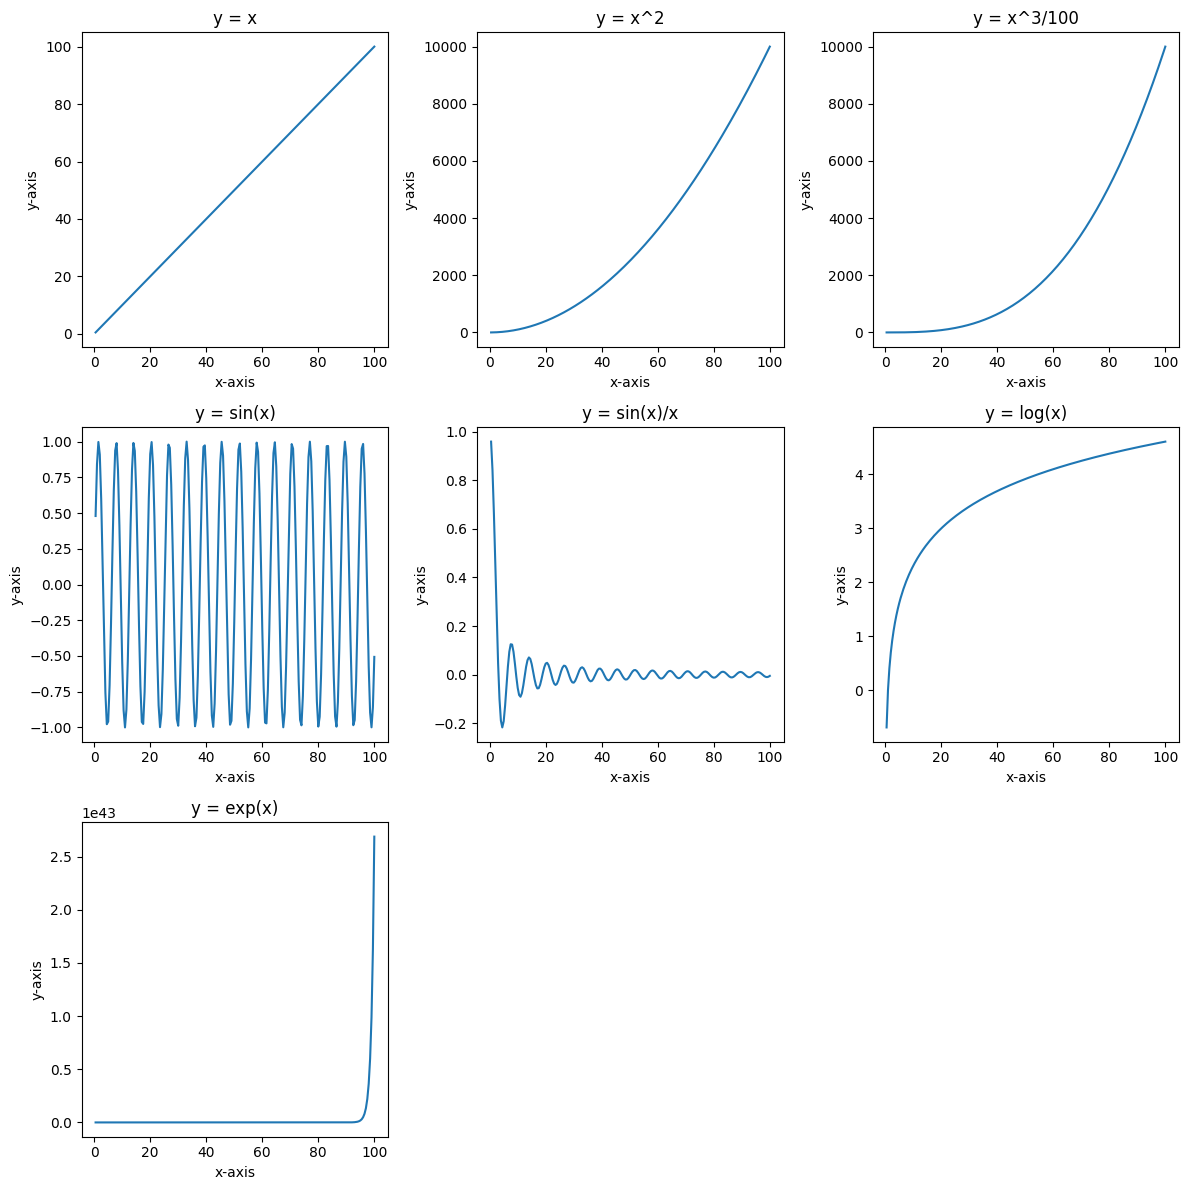

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)
y1 = x
y2 = x**2
y3 = (x**3) / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

axs[0, 0].plot(x, y1, label='y = x')
axs[0, 1].plot(x, y2, label='y = x^2')
axs[0, 2].plot(x, y3, label='y = x^3/100')
axs[1, 0].plot(x, y4, label='y = sin(x)')
axs[1, 1].plot(x, y5, label='y = sin(x)/x')
axs[1, 2].plot(x, y6, label='y = log(x)')
axs[2, 0].plot(x, y7, label='y = exp(x)')

axs[0, 0].set_title('y = x')
axs[0, 1].set_title('y = x^2')
axs[0, 2].set_title('y = x^3/100')
axs[1, 0].set_title('y = sin(x)')
axs[1, 1].set_title('y = sin(x)/x')
axs[1, 2].set_title('y = log(x)')
axs[2, 0].set_title('y = exp(x)')

for ax in axs.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')

# Remove empty subplots
for i in range(2, 3):
    for j in range(1, 3):
        axs[i, j].axis('off')

for ax in axs.flat:
    if ax.get_legend():
        ax.legend()

plt.tight_layout()
plt.show()

### ***10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.***

In [15]:
import pandas as pd

In [31]:
matrix = np.random.uniform(1, 2, size = (20,5))
columns = ['a','b','c','d','e']
df = pd.DataFrame(matrix , columns = columns)

df_std = [0]*5
df_mean = [0]*20

for i,col in enumerate(columns):
  df_std[i] = df[col].std()
for i in range(20):
  df_mean[i] = df.loc[i].mean()

max_std = df_std[0]
max_std_idx = 0
min_mean = df_mean[0]
min_mean_idx = 0

for i in range(len(columns)):
  if df_std[i] > max_std:
    max_std = df_std[i]
    max_std_idx = i
for i in range(20):
  if df_mean[i] < min_mean:
    min_mean = df_mean[i]
    min_mean_idx = i
print(df)
print("*"*70)
print(f"Column with the higest standerd devation:- {columns[max_std_idx]}")
print(f"Row with the lowest mean:- {min_mean_idx}")

           a         b         c         d         e
0   1.549897  1.392463  1.774251  1.708918  1.911469
1   1.352088  1.390425  1.739437  1.362399  1.620943
2   1.935831  1.596651  1.809080  1.225402  1.580754
3   1.303823  1.376501  1.249148  1.115639  1.274992
4   1.575297  1.376187  1.995220  1.871040  1.666347
5   1.216476  1.751737  1.314041  1.824873  1.298962
6   1.125984  1.810701  1.883420  1.787417  1.134585
7   1.118252  1.269282  1.253100  1.633647  1.163829
8   1.714325  1.135424  1.319757  1.010669  1.916749
9   1.476683  1.097854  1.827864  1.051180  1.448101
10  1.941591  1.791232  1.460592  1.342101  1.370307
11  1.729131  1.771750  1.238356  1.981678  1.821085
12  1.468952  1.559164  1.072322  1.963131  1.933697
13  1.938566  1.111257  1.176807  1.206157  1.789384
14  1.418656  1.721408  1.072273  1.162013  1.108596
15  1.950577  1.273855  1.718953  1.717827  1.488800
16  1.095041  1.464775  1.215987  1.491321  1.307798
17  1.369165  1.085024  1.841233  1.837402  1.

### ***11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.***

In [32]:
row_sum = df.sum(axis=1)

df['f'] = list(row_sum)
df['g'] =  df['f'].apply(lambda x: 'LT8' if x<8 else 'GT8')
print(df)
print("*"*70)

lt8 = df[df['g']=='LT8']
lt8_std = lt8['f'].std()

gt8 = df[df['g']=='GT8']
gt8_std = gt8['f'].std()

print(f"Number of values in g having entry 'LT8':- {lt8.shape[0]}")
print(f"Standerd devation in f where entry in g is 'LT8':- {lt8_std}")
print(f"Number of values in g having entry 'GT8':- {gt8.shape[0]}")
print(f"Standerd devation in f where entry in g is 'GT8':- {gt8_std}")

           a         b         c         d         e         f    g
0   1.549897  1.392463  1.774251  1.708918  1.911469  8.336999  GT8
1   1.352088  1.390425  1.739437  1.362399  1.620943  7.465292  LT8
2   1.935831  1.596651  1.809080  1.225402  1.580754  8.147718  GT8
3   1.303823  1.376501  1.249148  1.115639  1.274992  6.320102  LT8
4   1.575297  1.376187  1.995220  1.871040  1.666347  8.484091  GT8
5   1.216476  1.751737  1.314041  1.824873  1.298962  7.406088  LT8
6   1.125984  1.810701  1.883420  1.787417  1.134585  7.742106  LT8
7   1.118252  1.269282  1.253100  1.633647  1.163829  6.438110  LT8
8   1.714325  1.135424  1.319757  1.010669  1.916749  7.096923  LT8
9   1.476683  1.097854  1.827864  1.051180  1.448101  6.901682  LT8
10  1.941591  1.791232  1.460592  1.342101  1.370307  7.905823  LT8
11  1.729131  1.771750  1.238356  1.981678  1.821085  8.542000  GT8
12  1.468952  1.559164  1.072322  1.963131  1.933697  7.997265  LT8
13  1.938566  1.111257  1.176807  1.206157  1.78

### ***12. Write a small piece of code to explain broadcasting in numpy.***

***Broadcasting allows these types of binary operations to be performed on arrays of different sizes***

## **Rules of Broadcasting**

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

* Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

* Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

* Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

**Example 1**

In [28]:
M = np.ones((2, 3))
a = np.arange(3)

* Let's consider an operation on these two arrays. The shape of the arrays are

 * M.shape = (2, 3)
 * a.shape = (3,)

* We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:

 * M.shape -> (2, 3)
 * a.shape -> (1, 3)

* By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

 * M.shape -> (2, 3)
 * a.shape -> (2, 3)

* The shapes match, and we see that the final shape will be (2, 3):

In [30]:
print(M + a)

[[1. 2. 3.]
 [1. 2. 3.]]


### ***13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.***

In [27]:
matrix = np.random.randint(1,100,size=(15,19))

print(matrix)
print("*"*100)
def ArgMin(matrix,ax):
  rows,columns = matrix.shape
  if ax==1:
    min_row_idx = [0]*rows
    for i in range(rows):
      val = np.inf
      val_idx = 0
      for j in range(columns):
        if val > matrix[i][j]:
          val = matrix[i][j]
          val_idx = j
      min_row_idx[i] = val_idx
    return min_row_idx

  elif ax==0:
    min_col_idx = [0]*columns
    for i in range(columns):
      val = np.inf
      val_idx = 0
      for j in range(rows):
        if val > matrix[j][i]:
          val = matrix[j][i]
          val_idx = j
      min_col_idx[i] = val_idx
    return min_col_idx
  else:
    return "Error"

min_idx_row = ArgMin(matrix,0)
min_idx_col = ArgMin(matrix,1)

print('Using defined function:-')
print(f'Indices of minimun element along row:-\n{min_idx_row}')
print(f'Indices of the minimum element along column:-\n{min_idx_col}')
print("*"*100)
min_idx_row_np = np.argmin(matrix,axis=0)
min_idx_col_np = np.argmin(matrix,axis=1)

print('Using argmin function:-')
print(f'Indices of minimun element along row:-\n{list(min_idx_row_np)}')
print(f'Indices of the minimum element along column:-\n{list(min_idx_col_np)}')

[[48 44 63 93 54 92 46 23 31 28 68 25 19 18 50 27 83 31 97]
 [93 51 60 40 56 61 56 76 49 62 88 12 97 66 92  5 14 83 48]
 [87 73 85 80 58 66 28 27 44 60  5 46 84 92  2 35 47 18 66]
 [15 37 24 88 26 59 78 61 29 50 30 30 78 89 12 90 67  2 42]
 [95 46 73 38 25 10 21 86 22 67 27 30 27 48 72 11 38  5 58]
 [63 93 93 84 69 47 45 49 13 69 92  3 14 81 90 64 48  2 57]
 [11 68  5 28  3 36 33 71 87 18 27 62 56 24 90 83 78 28 70]
 [28 72 99 31 82 54 52 99 58 39 69 62 82 15 81 42 86 14  3]
 [97 97 37 81 28 93 57 14 96 28 56  1 74  7 63 27 98  7 41]
 [42 31 15 41 47 69 74 94 59 70 15  7 15 70 87  7 98 74 51]
 [53 77 63 14 60 50 54 99 58 28 87 53 82 91 96 56 13 18 75]
 [20 26 86  8 67 24 70 69  3 99 73 75 14 55 20 55 58 89 13]
 [12 70 70  5 71  5 12 49 77 86 92 62 30  7 27 94 66 57 26]
 [61 83 94 55 18 43 20 27 93 23 12 40 13 12 10 28 14 87 26]
 [37 64 38 86 85 23 73 24 38 19 17 65 99  2 88 87  8 59 83]]
***************************************************************************************************